In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import itertools

In [2]:
def get_FE_profile(filename, ref_vol, fillna_bool=False):
    df = pd.read_csv(filename, sep='\s+')
    if fillna_bool:
        df = df.fillna(40000)
    else:
        df = df.dropna()
    #df = df.fillna(0)
    df = df.reset_index()
    df['avg_press'] *= 101325
    closest_to_zero = (df['volume'] - ref_vol).apply(abs)
    rel_id = closest_to_zero.argmin()
    df['volume'] *= (1e-10)**3

    free_eng_list = [0]
    for i in range(1,len(df['avg_press'])):
        free_eng_list.append(-integrate.trapz(df['avg_press'].array[:i], x=df['volume'].array[:i]))
        
    free_eng = np.array(free_eng_list)
    free_eng *= 6.022e23 / 1000
    #free_eng -= min(free_eng)
    free_eng -= free_eng[rel_id]

    return df.copy(), free_eng

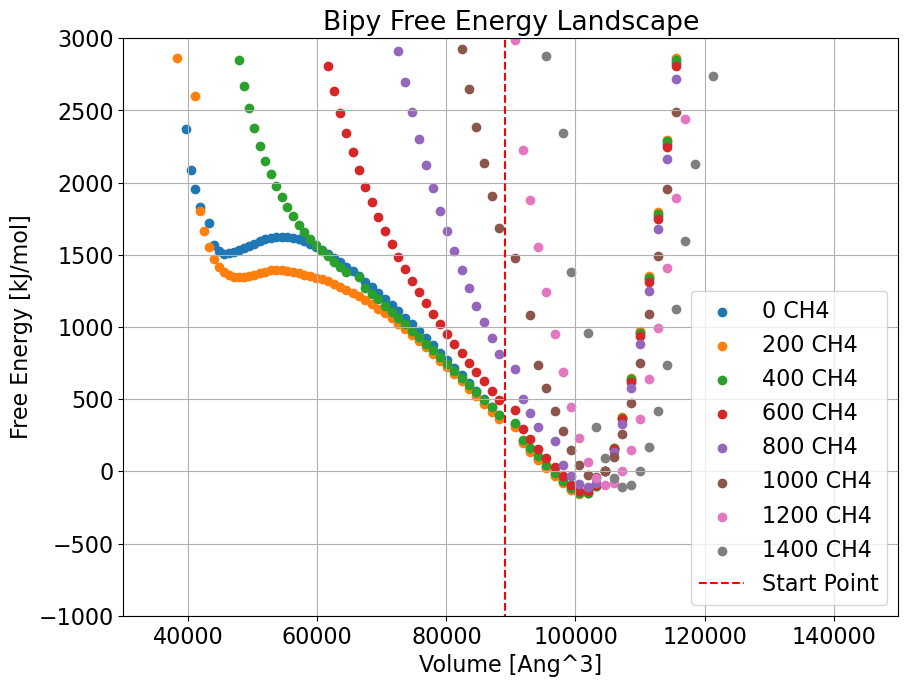

--------------------------------------------
df_0
28.51018780128731 14282.916660436429
28.71018953710986 14282.916660436429
28.910191047561145 13105.09640913998
29.110192734766652 12062.995987027389
29.310194203083878 11136.331437064775
29.510195843685672 10311.03583333506
29.710197271606525 9553.837191756946
29.91019886750832 8845.045533697528
30.510203161650217 8155.556571978541
31.110207117534934 6365.481378913682
31.31020874386233 5059.156598712218
31.710211426972112 4723.505607765406
32.11021404174976 4168.907990280713
32.51021659077166 3714.4633753973903
32.710217919278804 3312.459783222728
33.71022386719529 3136.46507861548
34.11022617651499 2372.3153837629634
34.31022738135165 2089.619920317049
34.51022843119137 1955.0310757552797
34.710229607808365 1830.4536768348626
35.1102317825174 1720.4031492102222
35.31023278418976 1566.786368060535
35.51023390726146 1525.418888320488
35.71023488608332 1507.2797059092136
35.91023598374233 1509.7085596035067
36.11023694048645 1519.82097464

In [3]:
#df_0, free_eng_0 = get_FE_profile('bipy_FreeEnergy_0.txt', 95000)
data_dir = 'FreeEnergy_May_data'
df_0, free_eng_0 = get_FE_profile(data_dir + '/pressures_bipy_0mol.txt', 105000)
df_200, free_eng_200 = get_FE_profile(data_dir + '/pressures_bipy_200mol.txt', 105000)
df_400, free_eng_400 = get_FE_profile(data_dir + '/pressures_bipy_400mol.txt', 105000)
df_600, free_eng_600 = get_FE_profile(data_dir + '/pressures_bipy_600mol.txt', 105000)
df_800, free_eng_800 = get_FE_profile(data_dir + '/pressures_bipy_800mol.txt', 105000)
df_1000, free_eng_1000 = get_FE_profile(data_dir + '/pressures_bipy_1000mol.txt', 105000)
df_1200, free_eng_1200 = get_FE_profile(data_dir + '/pressures_bipy_1200mol.txt', 107000)
df_1400, free_eng_1400 = get_FE_profile(data_dir + '/pressures_bipy_1400mol.txt', 110000)

""""""

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(10,7.5))
plt.scatter(df_0['volume']*1e30, free_eng_0, label='0 CH4')
plt.scatter(df_200['volume']*1e30, free_eng_200, label='200 CH4')
plt.scatter(df_400['volume']*1e30, free_eng_400, label='400 CH4')
plt.scatter(df_600['volume']*1e30, free_eng_600, label='600 CH4')
plt.scatter(df_800['volume']*1e30, free_eng_800, label='800 CH4')
plt.scatter(df_1000['volume']*1e30, free_eng_1000, label='1000 CH4')
plt.scatter(df_1200['volume']*1e30, free_eng_1200, label='1200 CH4')
plt.scatter(df_1400['volume']*1e30, free_eng_1400, label='1400 CH4')
plt.plot([89050, 89050], [-2000,3000], 'r--', label='Start Point')
plt.xlabel('Volume [Ang^3]')
plt.ylabel('Free Energy [kJ/mol]')
plt.grid()
plt.ylim((-1000,3000))
plt.xlim((30000,150000))
plt.legend(loc='lower right')
plt.title('Bipy Free Energy Landscape')
plt.savefig('Bipy_FE_Landscape.png', dpi=400)
plt.show()


print("--------------------------------------------")
print("df_0")
for i in range(len(df_0['volume'])):
    print((df_0['volume'].iloc[i]*1e30)**(1/3), free_eng_0[i])

print("--------------------------------------------")
print("df_200")
for i in range(len(df_200['volume'])):
    print((df_200['volume'].iloc[i]*1e30)**(1/3), free_eng_200[i])

print("--------------------------------------------")
print("df_400")
for i in range(len(df_400['volume'])):
    print((df_400['volume'].iloc[i]*1e30)**(1/3), free_eng_400[i])

print("--------------------------------------------")
print("df_1400")
for i in range(len(df_1400['volume'])):
    print((df_1400['volume'].iloc[i]*1e30)**(1/3), free_eng_1400[i])




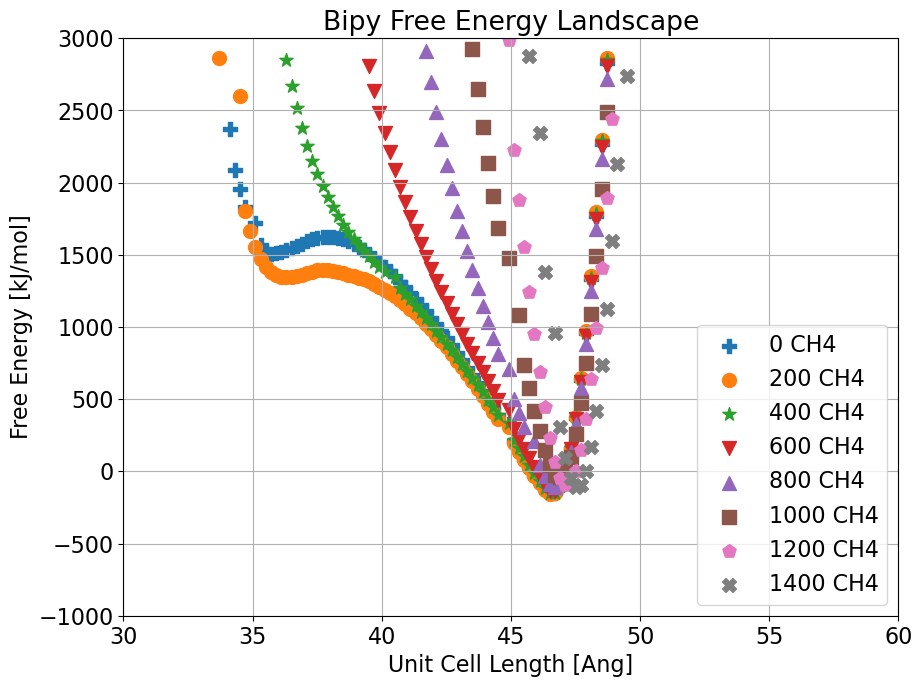

--------------------------------------------
df_0
28.51018780128731 14282.916660436429
28.71018953710986 14282.916660436429
28.910191047561145 13105.09640913998
29.110192734766652 12062.995987027389
29.310194203083878 11136.331437064775
29.510195843685672 10311.03583333506
29.710197271606525 9553.837191756946
29.91019886750832 8845.045533697528
30.510203161650217 8155.556571978541
31.110207117534934 6365.481378913682
31.31020874386233 5059.156598712218
31.710211426972112 4723.505607765406
32.11021404174976 4168.907990280713
32.51021659077166 3714.4633753973903
32.710217919278804 3312.459783222728
33.71022386719529 3136.46507861548
34.11022617651499 2372.3153837629634
34.31022738135165 2089.619920317049
34.51022843119137 1955.0310757552797
34.710229607808365 1830.4536768348626
35.1102317825174 1720.4031492102222
35.31023278418976 1566.786368060535
35.51023390726146 1525.418888320488
35.71023488608332 1507.2797059092136
35.91023598374233 1509.7085596035067
36.11023694048645 1519.82097464

In [5]:
marker = itertools.cycle(('P', 'o', '*', 'v', '^', 's', 'p', 'X', 'D'))
plt.rcParams['lines.markersize'] = 10

#df_0, free_eng_0 = get_FE_profile('bipy_FreeEnergy_0.txt', 95000)
data_dir = 'FreeEnergy_May_data'
df_0, free_eng_0 = get_FE_profile(data_dir + '/pressures_bipy_0mol.txt', 105000)
df_200, free_eng_200 = get_FE_profile(data_dir + '/pressures_bipy_200mol.txt', 105000)
df_400, free_eng_400 = get_FE_profile(data_dir + '/pressures_bipy_400mol.txt', 105000)
df_600, free_eng_600 = get_FE_profile(data_dir + '/pressures_bipy_600mol.txt', 105000)
df_800, free_eng_800 = get_FE_profile(data_dir + '/pressures_bipy_800mol.txt', 105000)
df_1000, free_eng_1000 = get_FE_profile(data_dir + '/pressures_bipy_1000mol.txt', 105000)
df_1200, free_eng_1200 = get_FE_profile(data_dir + '/pressures_bipy_1200mol.txt', 107000)
df_1400, free_eng_1400 = get_FE_profile(data_dir + '/pressures_bipy_1400mol.txt', 110000)

""""""

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(10,7.5))
n = 1/3
plt.scatter((df_0['volume']*1e30)**n, free_eng_0, label='0 CH4', marker=next(marker))
plt.scatter((df_200['volume']*1e30)**n, free_eng_200, label='200 CH4', marker=next(marker))
plt.scatter((df_400['volume']*1e30)**n, free_eng_400, label='400 CH4', marker=next(marker))
plt.scatter((df_600['volume']*1e30)**n, free_eng_600, label='600 CH4', marker=next(marker))
plt.scatter((df_800['volume']*1e30)**n, free_eng_800, label='800 CH4', marker=next(marker))
plt.scatter((df_1000['volume']*1e30)**n, free_eng_1000, label='1000 CH4', marker=next(marker))
plt.scatter((df_1200['volume']*1e30)**n, free_eng_1200, label='1200 CH4', marker=next(marker))
plt.scatter((df_1400['volume']*1e30)**n, free_eng_1400, label='1400 CH4', marker=next(marker))
#plt.plot(np.array([89050, 89050])**n, [-2000,3000], 'r--', label='Start Point')
plt.xlabel('Unit Cell Length [Ang]')
plt.ylabel('Free Energy [kJ/mol]')
plt.grid()
plt.ylim((-1000,3000))
plt.xlim((30,60))
plt.legend(loc='lower right')
plt.title('Bipy Free Energy Landscape')
plt.savefig('Bipy_FE_Landscape_t2.png', dpi=400)
plt.show()


print("--------------------------------------------")
print("df_0")
for i in range(len(df_0['volume'])):
    print((df_0['volume'].iloc[i]*1e30)**(1/3), free_eng_0[i])

print("--------------------------------------------")
print("df_200")
for i in range(len(df_200['volume'])):
    print((df_200['volume'].iloc[i]*1e30)**(1/3), free_eng_200[i])

print("--------------------------------------------")
print("df_400")
for i in range(len(df_400['volume'])):
    print((df_400['volume'].iloc[i]*1e30)**(1/3), free_eng_400[i])

print("--------------------------------------------")
print("df_1400")
for i in range(len(df_1400['volume'])):
    print((df_1400['volume'].iloc[i]*1e30)**(1/3), free_eng_1400[i])




In [4]:
data_dir = 'FreeEnergy_May_data'
df_0, free_eng_0 = get_FE_profile(data_dir + '/pressures_bipy_0mol.txt', 105000, fillna_bool=True)
df_200, free_eng_200 = get_FE_profile(data_dir + '/pressures_bipy_200mol.txt', 105000, fillna_bool=True)
df_400, free_eng_400 = get_FE_profile(data_dir + '/pressures_bipy_400mol.txt', 105000, fillna_bool=True)
df_600, free_eng_600 = get_FE_profile(data_dir + '/pressures_bipy_600mol.txt', 105000, fillna_bool=True)
df_800, free_eng_800 = get_FE_profile(data_dir + '/pressures_bipy_800mol.txt', 105000, fillna_bool=True)
df_1000, free_eng_1000 = get_FE_profile(data_dir + '/pressures_bipy_1000mol.txt', 105000, fillna_bool=True)
df_1200, free_eng_1200 = get_FE_profile(data_dir + '/pressures_bipy_1200mol.txt', 107000, fillna_bool=True)
df_1400, free_eng_1400 = get_FE_profile(data_dir + '/pressures_bipy_1400mol.txt', 110000, fillna_bool=True)

#Contour Plot
loading_array = np.array([0, 200, 400, 600, 800, 1000, 1200, 1400])
vol_0 = (df_0['volume']).array*1e30
vol_200 = (df_200['volume']).array*1e30
vol_400 = (df_400['volume']).array*1e30
vol_600 = (df_600['volume']).array*1e30
vol_800 = (df_800['volume']).array*1e30
vol_1000 = (df_1000['volume']).array*1e30
vol_1200 = (df_1200['volume']).array*1e30
vol_1400 = (df_1400['volume']).array*1e30

full_vol_array = np.concatenate((vol_0, vol_200, vol_400, vol_600, vol_800, vol_1000, vol_1200, vol_1400))

#full_eng_array = np.concatenate((free_eng_0, free_eng_200, free_eng_400, free_eng_600, free_eng_800, free_eng_1000, free_eng_1200, free_eng_1400))
#print(full_eng_array.shape)
full_eng_array = np.array([free_eng_0, free_eng_200, free_eng_400, free_eng_600, free_eng_800, free_eng_1000, free_eng_1200, free_eng_1400])

print(len(vol_0))
print(len(vol_1000))
print(len(loading_array))
print(full_eng_array.shape)

plt.contourf(vol_0.tolist(), loading_array.tolist(), full_eng_array, vmin=-1600, vmax=30000, cmap='viridis', levels=np.linspace(-1600,30000,21))
cbar = plt.colorbar(extend='both')
plt.clim(vmin=-1600, vmax=30000)

plt.title('Free Energy Profile bipy')
plt.xlabel('Volume [A^3]'); plt.ylabel('Loading')
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (8,) + inhomogeneous part.